# Arima

In [379]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings("ignore") 
from statsmodels.tsa.seasonal import seasonal_decompose 

In [380]:
airline = pd.read_csv('AirPassengers.csv',index_col ='Month',parse_dates = True) 
airline

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


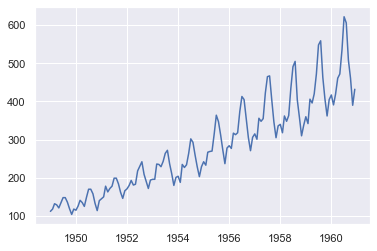

In [426]:
plt.plot(airline)

Figure(432x288)


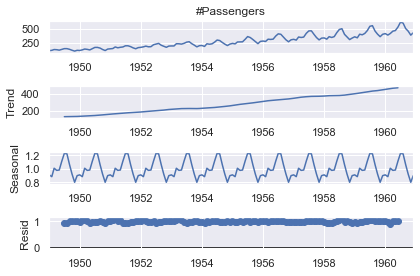

In [434]:
result = seasonal_decompose(airline['#Passengers'],model ='multiplicative') 
print(result.plot())

In [382]:
from pmdarima import auto_arima 
  

  
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    
                          suppress_warnings = True,
                          stepwise = True)          
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=1.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.31 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.66 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.92 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.55 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.20 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.99 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 10 Nov 2020   AIC                           1019.178
Time:                                     11:59:41   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [383]:
train = airline.iloc[:len(airline)-44] 
test = airline.iloc[len(airline)-44:] # set one year(12 months) for testing 
  
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['#Passengers'],  
                order = (0, 1, 1),seasonal_order=(2,1,0,12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  100
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -319.164
Date:                             Tue, 10 Nov 2020   AIC                            646.327
Time:                                     11:59:42   BIC                            656.191
Sample:                                 01-01-1949   HQIC                           650.299
                                      - 04-01-1957                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2576      0.100     -2.567      0.010      -0.454      -0.061
ar.S.L12      -0.2086      0.108     -1.937      0.053      -0.420       0.002
ar.S.L24       0.0168      0.122      0.137      0.891      -0.223       0.256
sigma2        89.3004     14.251      6.266      0.000      61.370     117.231
===================================================================================
Ljung-Box (Q):                       41.94   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.39   Prob(JB):                         0.26
Heteroskedasticity (H):               1.32   Skew:                             0.42
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

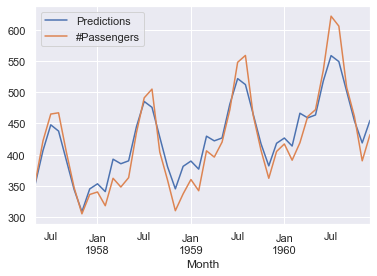

In [384]:
start = len(train) 
end = len(train) + len(test) - 1
  
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 


In [385]:
from statsmodels.tools.eval_measures import rmse
arima_rmse=rmse(test["#Passengers"], predictions) 
arima_rmse  

25.882271700667772

# RNN 

In [386]:
from tensorflow.keras import layers

In [387]:
trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
testX = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print('shape of trainX: ', trainX.shape)
print('shape of testX: ', testX.shape)

shape of trainX:  (98, 1, 1)
shape of testX:  (42, 1, 1)


In [388]:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (trainX.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 80,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 30,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fifth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 20))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(trainX, y_train, epochs = 250, batch_size = 50)


Epoch 1/250
98/98 [==============================] - 3s 31ms/step - loss: 0.0593
Epoch 2/250
98/98 [==============================] - 0s 306us/step - loss: 0.0361
Epoch 3/250
98/98 [==============================] - 0s 234us/step - loss: 0.0221
Epoch 4/250
98/98 [==============================] - 0s 153us/step - loss: 0.0178
Epoch 5/250
98/98 [==============================] - 0s 184us/step - loss: 0.0105
Epoch 6/250
98/98 [==============================] - 0s 143us/step - loss: 0.0204
Epoch 7/250
98/98 [==============================] - 0s 143us/step - loss: 0.0215
Epoch 8/250
98/98 [==============================] - 0s 197us/step - loss: 0.0150
Epoch 9/250
98/98 [==============================] - 0s 133us/step - loss: 0.0132
Epoch 10/250
98/98 [==============================] - 0s 143us/step - loss: 0.0127
Epoch 11/250
98/98 [==============================] - 0s 171us/step - loss: 0.0101
Epoch 12/250
98/98 [==============================] - 0s 153us/step - loss: 0.0116
Epoch 13/250
9

98/98 [==============================] - 0s 149us/step - loss: 0.0051
Epoch 100/250
98/98 [==============================] - 0s 208us/step - loss: 0.0058
Epoch 101/250
98/98 [==============================] - 0s 153us/step - loss: 0.0048
Epoch 102/250
98/98 [==============================] - 0s 163us/step - loss: 0.0047
Epoch 103/250
98/98 [==============================] - 0s 158us/step - loss: 0.0056
Epoch 104/250
98/98 [==============================] - 0s 235us/step - loss: 0.0064
Epoch 105/250
98/98 [==============================] - 0s 191us/step - loss: 0.0053
Epoch 106/250
98/98 [==============================] - 0s 163us/step - loss: 0.0049
Epoch 107/250
98/98 [==============================] - 0s 163us/step - loss: 0.0052
Epoch 108/250
98/98 [==============================] - 0s 153us/step - loss: 0.0044
Epoch 109/250
98/98 [==============================] - 0s 155us/step - loss: 0.0031
Epoch 110/250
98/98 [==============================] - 0s 153us/step - loss: 0.0039
Epoch 

98/98 [==============================] - 0s 131us/step - loss: 0.0043
Epoch 197/250
98/98 [==============================] - 0s 143us/step - loss: 0.0066
Epoch 198/250
98/98 [==============================] - 0s 133us/step - loss: 0.0044
Epoch 199/250
98/98 [==============================] - 0s 153us/step - loss: 0.0050
Epoch 200/250
98/98 [==============================] - 0s 153us/step - loss: 0.0049
Epoch 201/250
98/98 [==============================] - 0s 133us/step - loss: 0.0041
Epoch 202/250
98/98 [==============================] - 0s 155us/step - loss: 0.0052
Epoch 203/250
98/98 [==============================] - 0s 143us/step - loss: 0.0046
Epoch 204/250
98/98 [==============================] - 0s 146us/step - loss: 0.0040
Epoch 205/250
98/98 [==============================] - 0s 143us/step - loss: 0.0041
Epoch 206/250
98/98 [==============================] - 0s 153us/step - loss: 0.0033
Epoch 207/250
98/98 [==============================] - 0s 143us/step - loss: 0.0046
Epoch 

In [389]:
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score: %.2f RMSE' % (testScore))

Score: 85.38 RMSE


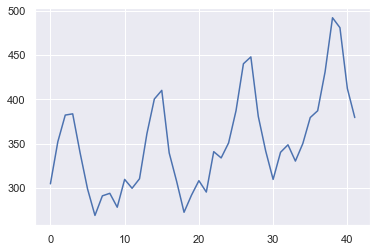

In [416]:
plt.plot(testPredict,label="RNN predicted")

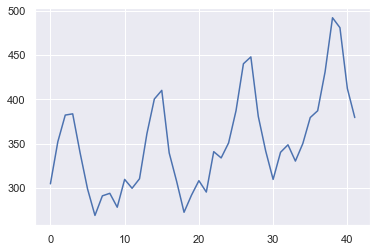

In [391]:
plt.plot(testPredict)

In [418]:
testScore

85.38039680171448

# LSTM 

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [396]:
dataset = pd.read_csv('AirPassengers.csv')
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset[:10]


array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]], dtype=int64)

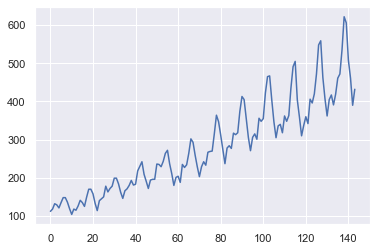

In [397]:
plt.plot(dataset)

In [398]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min(),dataset.max()

(0.0, 1.0)

In [399]:
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [400]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

In [401]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back =1
X_train, y_train = get_data(train, look_back)
X_train[:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [402]:
X_test, y_test = get_data(test, look_back)

In [403]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [404]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [405]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 5)                 140       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [406]:
model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
98/98 [==============================] - 10s 105ms/sample - loss: 0.0303
Epoch 2/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0127
Epoch 3/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0101
Epoch 4/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0091
Epoch 5/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0080
Epoch 6/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0069
Epoch 7/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0059
Epoch 8/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 9/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0042
Epoch 10/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0035
Epoch 11/100
98/98 [==============================] - 0s 3ms/sample - loss: 0.0030
Epoch 12/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0028
Epoch 13/1

98/98 [==============================] - 0s 4ms/sample - loss: 0.0022
Epoch 99/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0022
Epoch 100/100
98/98 [==============================] - 0s 4ms/sample - loss: 0.0022


In [407]:
y_pred = model.predict(X_test)

In [408]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

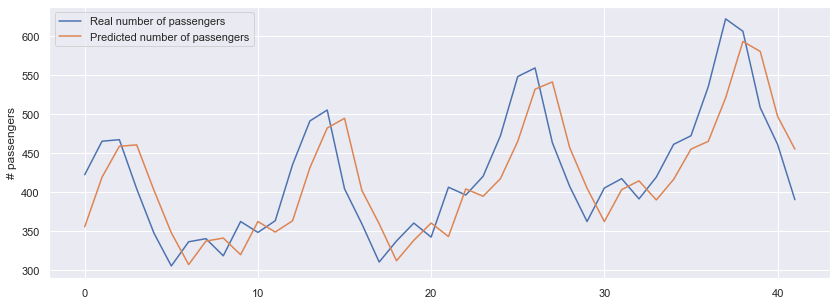

In [409]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [410]:
lstm_rmse=rmse(y_test,y_pred) 
lstm_rmse

array([48.5801089])

# Comparision

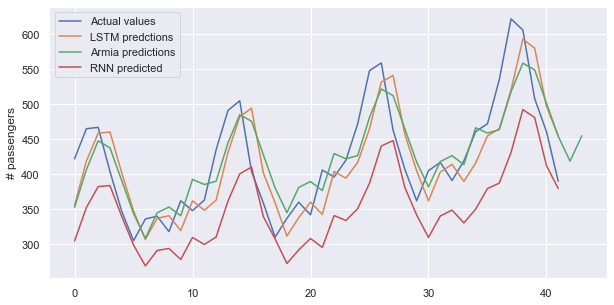

In [421]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label = 'Actual values')
plt.plot(y_pred, label = 'LSTM predctions')
plt.plot(predictions.values,label="Armia predictions")
plt.plot(testPredict,label="RNN predicted")
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [419]:
print("RMSE of LSTM : ",lstm_rmse)
print("RMSE of arima : ",arima_rmse)
print("RMSE of RNN : ",testScore)

RMSE of LSTM :  [48.5801089]
RMSE of arima :  25.882271700667772
RMSE of RNN :  85.38039680171448
